In [208]:
import pandas as pd
import numpy as np
import datetime
import hvplot.pandas

pd.set_option('display.max_columns', None)

In [209]:
ridership_ori = pd.read_csv('data/Ridership.csv')
ridership_ori.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid
0,08/04/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,11,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-08-04T04:00:00H0071 Av (L)MLomny
1,02/13/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-02-13T03:00:00H0071 Av (L)MLomny
2,03/08/2023 04:00:00 AM,H007,1 Av (L),M,L,omny,4,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-03-08T04:00:00H0071 Av (L)MLomny
3,03/23/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-03-23T03:00:00H0071 Av (L)MLomny
4,04/03/2023 05:00:00 AM,H007,1 Av (L),M,L,omny,28,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-04-03T05:00:00H0071 Av (L)MLomny


In [210]:
# Grab the station information and drop the duplicates and output to a csv
stations = ridership_ori[['station_complex_id', 'station_complex', 'borough', 'routes', 'latitude', 'longitude', 'Georeference']].drop_duplicates()
stations.to_csv('data/stations.csv', index=False)

In [211]:
Georeference_unique = ridership_ori[['longitude', 'latitude']]
Georeference_unique.drop_duplicates(inplace=True)
Georeference_unique.head()

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_32649/1963311901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Georeference_unique.drop_duplicates(inplace=True)


,longitude,latitude
0,-73.981628,40.730953
6,-73.968376,40.799446
49,-73.947479,40.790600
93,-73.961456,40.796093
94,-73.862701,40.749866


<AxesSubplot: >

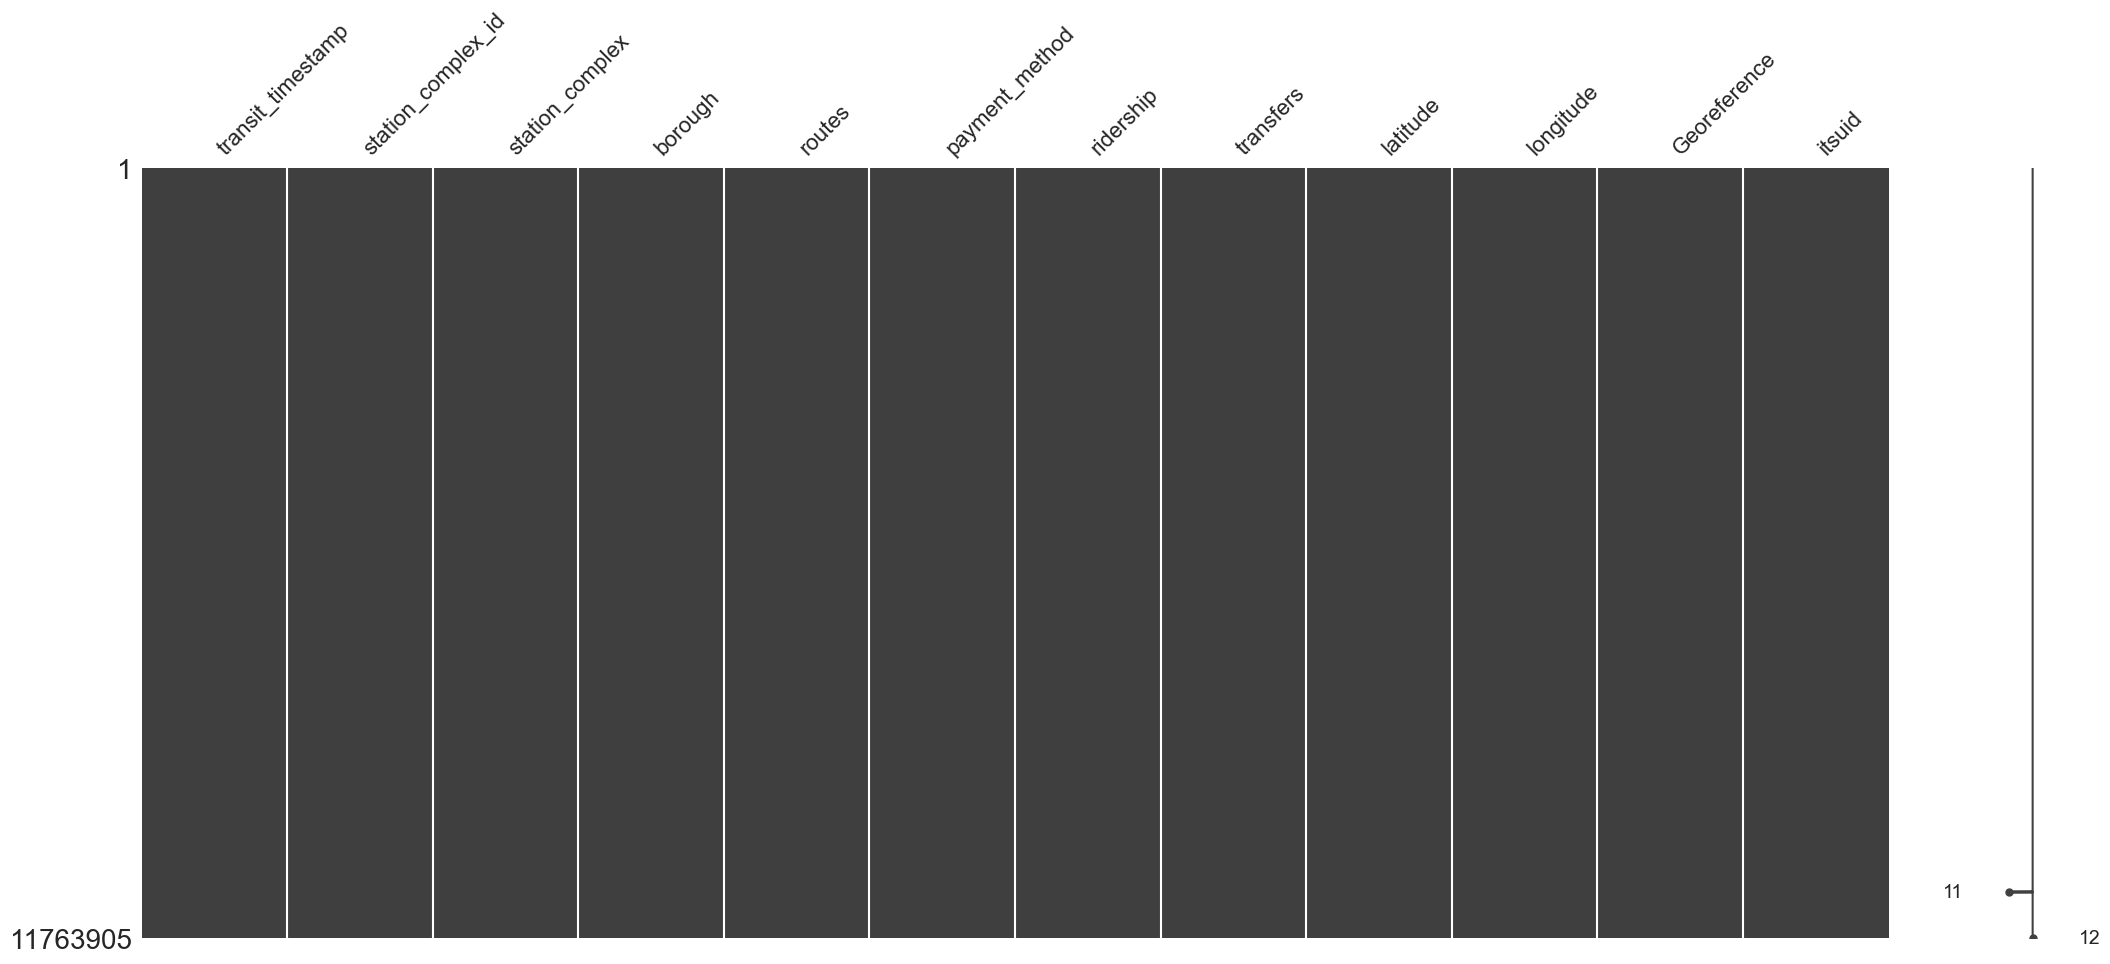

In [212]:
import missingno

missingno.matrix(ridership_ori)

In [213]:
date_format = "%m/%d/%Y %I:%M:%S %p"

ridership = ridership_ori.copy()
ridership['transit_timestamp'] = pd.to_datetime(ridership['transit_timestamp'], format=date_format)
ridership.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid
0,2022-08-04 04:00:00,H007,1 Av (L),M,L,omny,11,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-08-04T04:00:00H0071 Av (L)MLomny
1,2023-02-13 03:00:00,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-02-13T03:00:00H0071 Av (L)MLomny
2,2023-03-08 04:00:00,H007,1 Av (L),M,L,omny,4,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-03-08T04:00:00H0071 Av (L)MLomny
3,2023-03-23 03:00:00,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-03-23T03:00:00H0071 Av (L)MLomny
4,2023-04-03 05:00:00,H007,1 Av (L),M,L,omny,28,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-04-03T05:00:00H0071 Av (L)MLomny


In [214]:
ridership['transit_timestamp'].describe()

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_32649/303941786.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ridership['transit_timestamp'].describe()


count                11763905
unique                  14566
top       2023-03-10 12:00:00
freq                      851
first     2022-02-01 00:00:00
last      2023-09-30 23:00:00
Name: transit_timestamp, dtype: object

In [215]:
# create specific date time columns for easier analysis

ridership['date'] = pd.to_datetime(ridership['transit_timestamp']).dt.date
ridership['year'] = pd.to_datetime(ridership['transit_timestamp']).dt.year
ridership['month'] = pd.to_datetime(ridership['transit_timestamp']).dt.month
ridership['day'] = pd.to_datetime(ridership['transit_timestamp']).dt.day
ridership['weekday'] = pd.to_datetime(ridership['transit_timestamp']).dt.weekday
ridership['week'] = pd.to_datetime(ridership['transit_timestamp']).dt.week
ridership['quarter'] = pd.to_datetime(ridership['transit_timestamp']).dt.quarter
ridership['hour'] = pd.to_datetime(ridership['transit_timestamp']).dt.hour
ridership['year-month'] = pd.to_datetime(ridership['transit_timestamp']).dt.to_period('M')
ridership['year-week'] = pd.to_datetime(ridership['transit_timestamp']).dt.to_period('W')

ridership.head()

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_32649/44221175.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  ridership['week'] = pd.to_datetime(ridership['transit_timestamp']).dt.week


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid,date,year,month,day,weekday,week,quarter,hour,year-month,year-week
0,2022-08-04 04:00:00,H007,1 Av (L),M,L,omny,11,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-08-04T04:00:00H0071 Av (L)MLomny,2022-08-04,2022,8,4,3,31,3,4,2022-08,2022-08-01/2022-08-07
1,2023-02-13 03:00:00,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-02-13T03:00:00H0071 Av (L)MLomny,2023-02-13,2023,2,13,0,7,1,3,2023-02,2023-02-13/2023-02-19
2,2023-03-08 04:00:00,H007,1 Av (L),M,L,omny,4,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-03-08T04:00:00H0071 Av (L)MLomny,2023-03-08,2023,3,8,2,10,1,4,2023-03,2023-03-06/2023-03-12
3,2023-03-23 03:00:00,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-03-23T03:00:00H0071 Av (L)MLomny,2023-03-23,2023,3,23,3,12,1,3,2023-03,2023-03-20/2023-03-26
4,2023-04-03 05:00:00,H007,1 Av (L),M,L,omny,28,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-04-03T05:00:00H0071 Av (L)MLomny,2023-04-03,2023,4,3,0,14,2,5,2023-04,2023-04-03/2023-04-09


In [216]:
ridership.to_csv('data/ridership_detail.csv', index=False)

In [217]:
ridership_hour = ridership.groupby('hour')['ridership', 'transfers'].mean().reset_index()
ridership_hour.head()

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_32649/192552649.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ridership_hour = ridership.groupby('hour')['ridership', 'transfers'].mean().reset_index()


,hour,ridership,transfers
0,0,53.563553,0.987524
1,1,25.405242,0.413990
2,2,15.744424,0.267108
3,3,13.735920,0.384550
4,4,28.471756,1.544500


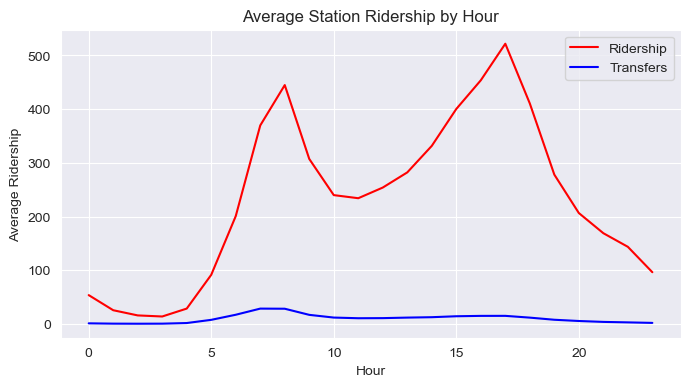

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

plt.figure(figsize=(8, 4))
sns.lineplot(x='hour', y='ridership', data=ridership_hour, color='red', label='Ridership')
sns.lineplot(x='hour', y='transfers', data=ridership_hour, color='blue', label = 'Transfers')
plt.xlabel('Hour')
plt.ylabel('Average Ridership')
plt.title('Average Station Ridership by Hour')
plt.legend()
plt.show()

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_32649/2557600607.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ridership_week = ridership.groupby('weekday')['ridership', 'transfers'].mean().reset_index()


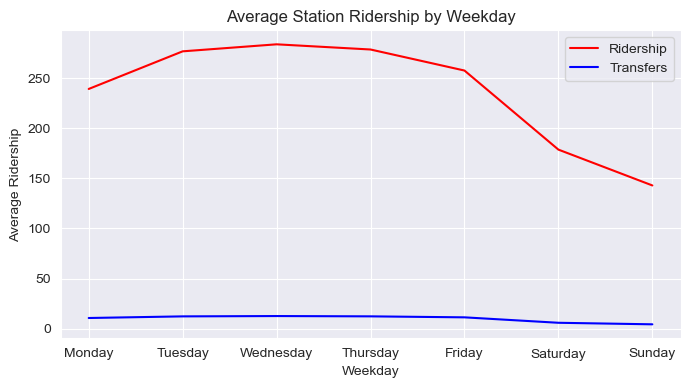

In [235]:
ridership_week = ridership.groupby('weekday')['ridership', 'transfers'].mean().reset_index()
ridership_week['weekday'] = ridership_week['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8, 4))
sns.lineplot(x='weekday', y='ridership', data=ridership_week, color='red', label='Ridership')
sns.lineplot(x='weekday', y='transfers', data=ridership_week, color='blue', label = 'Transfers')
plt.xlabel('Weekday')
plt.ylabel('Average Ridership')
plt.title('Average Station Ridership by Weekday')
plt.legend()

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_32649/3577568902.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ridership_month = ridership.groupby('month')['ridership', 'transfers'].mean().reset_index()


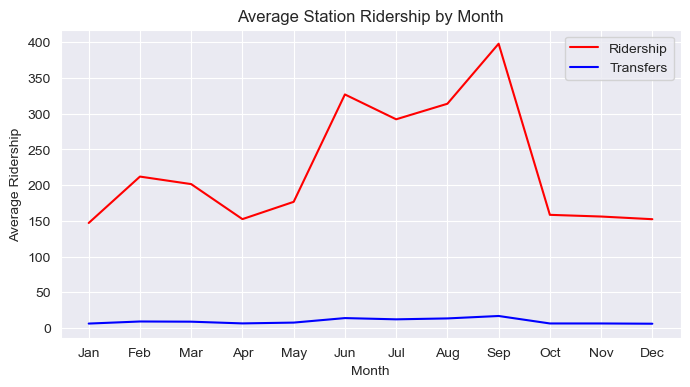

In [239]:
ridership_month = ridership.groupby('month')['ridership', 'transfers'].mean().reset_index()
ridership_month['month'] = ridership_month['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct' ,'Nov', 'Dec'])

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x='month', y='ridership', data=ridership_month, color='red', label='Ridership')
sns.lineplot(x='month', y='transfers', data=ridership_month, color='blue', label = 'Transfers')
plt.xlabel('Month')
plt.ylabel('Average Ridership')
plt.title('Average Station Ridership by Month')
plt.legend()
plt.show()


In [221]:
ridership_yearmonth = ridership.groupby('year-month')['ridership', 'transfers'].mean().reset_index()
ridership_yearmonth.head()
ridership_yearmonth['timestamp'] = ridership_yearmonth['year-month'].astype(str)

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_32649/222053976.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ridership_yearmonth = ridership.groupby('year-month')['ridership', 'transfers'].mean().reset_index()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2022-02'),
  Text(1, 0, '2022-03'),
  Text(2, 0, '2022-04'),
  Text(3, 0, '2022-05'),
  Text(4, 0, '2022-06'),
  Text(5, 0, '2022-07'),
  Text(6, 0, '2022-08'),
  Text(7, 0, '2022-09'),
  Text(8, 0, '2022-10'),
  Text(9, 0, '2022-11'),
  Text(10, 0, '2022-12'),
  Text(11, 0, '2023-01'),
  Text(12, 0, '2023-02'),
  Text(13, 0, '2023-03'),
  Text(14, 0, '2023-04'),
  Text(15, 0, '2023-05'),
  Text(16, 0, '2023-06'),
  Text(17, 0, '2023-07'),
  Text(18, 0, '2023-08'),
  Text(19, 0, '2023-09')])

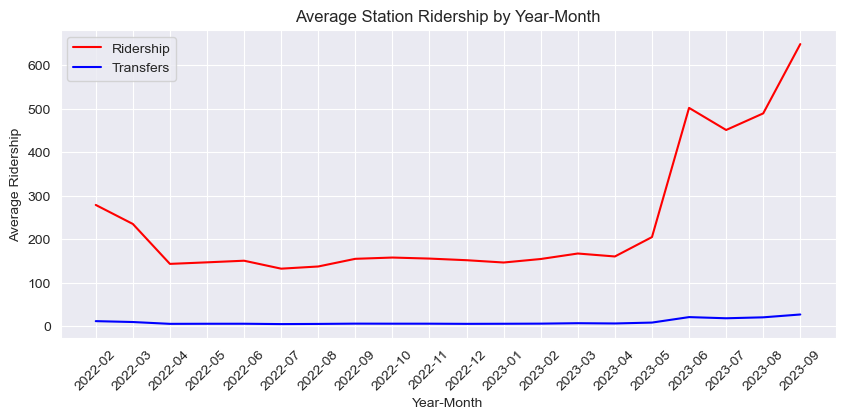

In [240]:
# plot year-month time series data
plt.figure(figsize=(10, 4))

sns.lineplot(x='timestamp', y='ridership', data=ridership_yearmonth, color='red', label='Ridership')
sns.lineplot(x='timestamp', y='transfers', data=ridership_yearmonth, color='blue', label = 'Transfers')

plt.xlabel('Year-Month')
plt.ylabel('Average Ridership')
plt.title('Average Station Ridership by Year-Month')
plt.legend()
# rotation of x-axis labels
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2022-02'),
  Text(1, 0, '2022-03'),
  Text(2, 0, '2022-04'),
  Text(3, 0, '2022-05'),
  Text(4, 0, '2022-06'),
  Text(5, 0, '2022-07'),
  Text(6, 0, '2022-08'),
  Text(7, 0, '2022-09'),
  Text(8, 0, '2022-10'),
  Text(9, 0, '2022-11'),
  Text(10, 0, '2022-12'),
  Text(11, 0, '2023-01'),
  Text(12, 0, '2023-02'),
  Text(13, 0, '2023-03'),
  Text(14, 0, '2023-04'),
  Text(15, 0, '2023-05'),
  Text(16, 0, '2023-06'),
  Text(17, 0, '2023-07'),
  Text(18, 0, '2023-08'),
  Text(19, 0, '2023-09')])

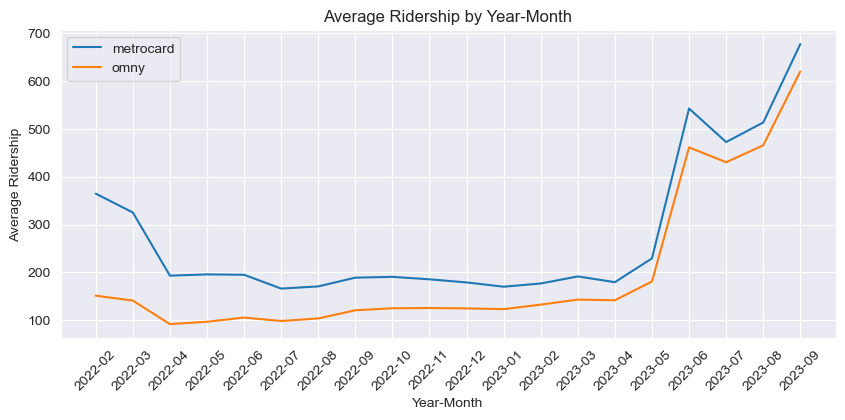

In [223]:
# payment_method rides by year-month

ridership_yearmonth_payment = ridership.groupby(['year-month', 'payment_method'])['ridership'].mean().reset_index()
ridership_yearmonth_payment['timestamp'] = ridership_yearmonth_payment['year-month'].astype(str)

plt.figure(figsize=(10, 4))
sns.lineplot(x='timestamp', y='ridership', data=ridership_yearmonth_payment, hue='payment_method')
plt.xlabel('Year-Month')
plt.ylabel('Average Ridership')
plt.title('Average Ridership by Year-Month')
plt.legend()
plt.xticks(rotation=45)


In [224]:
# use holoviz to plot all the geo points Georeference_unique on nyc map based on 'longitude', 'latitude'
Georeference_unique.hvplot.points('longitude', 'latitude', geo=True, tiles='CartoLight', color='red', size=10, frame_width=700, frame_height=500)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

In [225]:
# Avg rider for each station at each hour of the day
ridership['total'] = ridership['ridership'] + ridership['transfers']
ridership_station_hour = ridership.groupby(['station_complex_id', 'hour'])['total'].mean().reset_index()
ridership_station_hour.head()

,station_complex_id,hour,total
0,A002,0,265.441494
1,A002,1,92.681063
2,A002,2,43.101836
3,A002,3,29.703086
4,A002,4,39.319767


In [226]:
ridership_station = ridership.groupby(['station_complex_id'])['total'].mean().reset_index()
ridership_station.head()

,station_complex_id,total
0,A002,1046.856990
1,A006,301.048241
2,A010,637.902334
3,A013,449.955056
4,A022,1993.520631


In [227]:
ridership_station_plot = ridership_station.merge(stations, how='left', on='station_complex_id')
ridership_station_plot['total_log'] = np.log(ridership_station_plot['total'])
ridership_station_plot.head()

,station_complex_id,total,station_complex,borough,routes,latitude,longitude,Georeference,total_log
0,A002,1046.856990,"Lexington Av (N,R,W)/59 St (4,5,6)",M,"5,N,R,4,,W,6",40.762661,-73.967255,POINT (-73.96725463867188 40.76266098022461),6.953548
1,A006,301.048241,"5 Av-59 St (N,R,W)",M,"N,R,W",40.764812,-73.973351,POINT (-73.97335052490234 40.76481246948242),5.707271
2,A010,637.902334,"57 St-7 Av (N,Q,R,W)",M,"N,R,Q,W",40.764664,-73.980659,POINT (-73.98065948486328 40.76466369628906),6.458185
3,A013,449.955056,"49 St (N,R,W)",M,"N,R,W",40.759899,-73.984138,POINT (-73.98413848876953 40.7598991394043),6.109148
4,A022,1993.520631,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",M,"F,M,N,R,Q,B,W,D",40.749718,-73.987823,POINT (-73.98782348632812 40.749717712402344),7.597658


In [228]:
import holoviews as hv
import hvplot.pandas
from bokeh.models import HoverTool


p = ridership_station_plot.hvplot.points(
    'longitude', 'latitude', geo=True, tiles='CartoLight', color='total_log', 
    size=10, frame_width=700, frame_height=500, cmap='plasma', hover_cols=['station_complex'],
)

from holoviews import opts

hover_tool = HoverTool(tooltips=[
    ("Station", "@station_complex"),
    ("Total Log", "@total_log"),
    # Add any other columns you'd like to show on hover
])

p = p.opts(
    opts.Points(tools=[hover_tool])
)

hv.output(p)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (total_log,station_complex)

In [229]:
ridership_station_hour_plot = ridership_station_hour.merge(stations, how='left', on='station_complex_id')
ridership_station_hour_plot['total_log'] = np.log(ridership_station_hour_plot['total'])
ridership_station_hour_plot.head()

,station_complex_id,hour,total,station_complex,borough,routes,latitude,longitude,Georeference,total_log
0,A002,0,265.441494,"Lexington Av (N,R,W)/59 St (4,5,6)",M,"5,N,R,4,,W,6",40.762661,-73.967255,POINT (-73.96725463867188 40.76266098022461),5.581394
1,A002,1,92.681063,"Lexington Av (N,R,W)/59 St (4,5,6)",M,"5,N,R,4,,W,6",40.762661,-73.967255,POINT (-73.96725463867188 40.76266098022461),4.529164
2,A002,2,43.101836,"Lexington Av (N,R,W)/59 St (4,5,6)",M,"5,N,R,4,,W,6",40.762661,-73.967255,POINT (-73.96725463867188 40.76266098022461),3.763566
3,A002,3,29.703086,"Lexington Av (N,R,W)/59 St (4,5,6)",M,"5,N,R,4,,W,6",40.762661,-73.967255,POINT (-73.96725463867188 40.76266098022461),3.391251
4,A002,4,39.319767,"Lexington Av (N,R,W)/59 St (4,5,6)",M,"5,N,R,4,,W,6",40.762661,-73.967255,POINT (-73.96725463867188 40.76266098022461),3.671727


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
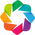

:HoloMap   [Hour]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [longitude,latitude]   (total_log,station_complex)

In [230]:
import holoviews as hv
hv.extension('bokeh')
from bokeh.plotting import show

grouped_data = ridership_station_hour_plot.groupby('hour')

global_min = ridership_station_hour_plot['total_log'].min()
global_max = ridership_station_hour_plot['total_log'].max()


plots = {hour: group.hvplot.points(
    'longitude', 'latitude', geo=True, tiles='CartoLight', color='total_log',
    size=10, frame_width=700, frame_height=500, cmap='plasma', hover_cols=['station_complex'],
    clim=(global_min, global_max)  # Use global color limits here
) for hour, group in grouped_data}

animated_plot = hv.HoloMap(plots, kdims='Hour')

from holoviews import opts

hover_tool = HoverTool(tooltips=[
    ("Station", "@station_complex"),
    ("Total Log", "@total_log"),
    # Add any other columns you'd like to show on hover
])

animated_plot = animated_plot.opts(
    opts.Points(tools=[hover_tool])
)

hv.output(animated_plot.opts(framewise=True, toolbar='left'))
hv.save(animated_plot.opts(framewise=True, toolbar='left'), 'data/animated_plot.html')


In [231]:
# save image as png for every hour

import os

if not os.path.exists('images'):
    os.makedirs('images')

for hour, group in grouped_data:
    plot = group.hvplot.points(
        'longitude', 'latitude', geo=True, tiles='CartoLight', color='total_log',
        size=10, frame_width=700, frame_height=500, cmap='plasma', hover_cols=['station_complex'],
        clim=(global_min, global_max), title=f'Hour {hour}'
    )
    hv.save(plot, f'images/{hour}.png')

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: headless chrome=116.0.5845.96)
Stacktrace:
0   chromedriver                        0x000000010468265c chromedriver + 4318812
1   chromedriver                        0x000000010467ad00 chromedriver + 4287744
2   chromedriver                        0x00000001042ac7ec chromedriver + 296940
3   chromedriver                        0x0000000104293134 chromedriver + 192820
4   chromedriver                        0x000000010429303c chromedriver + 192572
5   chromedriver                        0x00000001043225d4 chromedriver + 779732
6   chromedriver                        0x00000001042de178 chromedriver + 500088
7   chromedriver                        0x00000001042defc0 chromedriver + 503744
8   chromedriver                        0x0000000104642c40 chromedriver + 4058176
9   chromedriver                        0x0000000104647160 chromedriver + 4075872
10  chromedriver                        0x000000010460ae68 chromedriver + 3829352
11  chromedriver                        0x0000000104647c4c chromedriver + 4078668
12  chromedriver                        0x000000010461ff08 chromedriver + 3915528
13  chromedriver                        0x0000000104664140 chromedriver + 4194624
14  chromedriver                        0x00000001046642c4 chromedriver + 4195012
15  chromedriver                        0x00000001046744d0 chromedriver + 4261072
16  libsystem_pthread.dylib             0x00000001837aa06c _pthread_start + 148
17  libsystem_pthread.dylib             0x00000001837a4e2c thread_start + 8
